In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# module which contains data related functions
from data_set import initialize, repr_im_hist, safe_save,plot_history

In [ ]:
# module which contains model related functions
from modelzoo import define_model, compile_model, string_predict_single

In [ ]:
import tensorflow.keras.callbacks as callbacks
import matplotlib.pyplot as plt

## 1. Different images views of the CT scan images

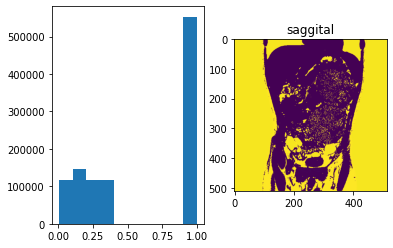

In [ ]:
repr_im_hist(im_path="/content/Corresponding id _9-36.png", title="saggital")

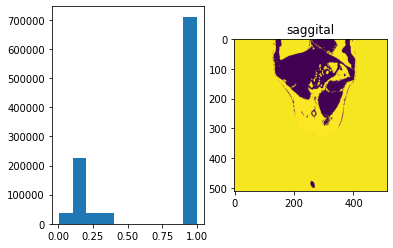

In [ ]:
repr_im_hist(im_path="/content/Corresponding id _9-15.png",title="saggital")

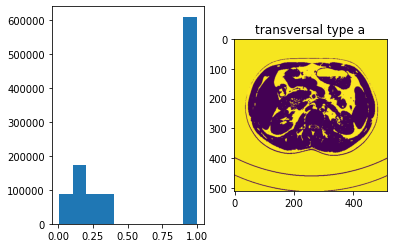

In [ ]:
repr_im_hist(im_path="/content/Corresponding id _12-107.png",title="transversal type a")


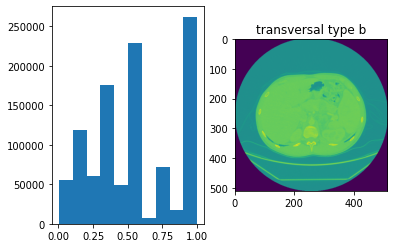

In [ ]:
repr_im_hist(im_path="/content/Corresponding id _10-236.png",title="transversal type b")


## 2. Train model to recognize the types of CT scan images
* type transversal type a
* type transversal type b
* type saggital

In [ ]:
# we create the traing, validation and test set
train_it,validation_it,test_it,class_map = initialize()

Found 2094 images belonging to 3 classes.
Found 407 images belonging to 3 classes.
Found 888 images belonging to 3 classes.


In [ ]:
# instantiate the classifier model
model = define_model()
ready_to_train_model = compile_model(model,lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# usual callbacks (early stopping to prevent overfitting)
# model checkpointer to save the best epoch weights
# save the results for tensorboard

my_callbacks = [
    callbacks.EarlyStopping(patience=4),
    callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
    callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
# fit model
history = ready_to_train_model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=validation_it, 
                    validation_steps=len(validation_it), 
                    epochs=20, 
                    verbose=1,
                    callbacks=my_callbacks)

Epoch 1/20
33/33 [==============================] - 19s 460ms/step - loss: 2.1511 - accuracy: 0.9121 - val_loss: 0.0775 - val_accuracy: 0.9386
Epoch 2/20
33/33 [==============================] - 15s 450ms/step - loss: 0.0185 - accuracy: 0.9914 - val_loss: 0.0682 - val_accuracy: 0.9877
Epoch 3/20
33/33 [==============================] - 15s 452ms/step - loss: 0.0161 - accuracy: 0.9967 - val_loss: 0.0747 - val_accuracy: 0.9705
Epoch 4/20
33/33 [==============================] - 15s 449ms/step - loss: 0.0159 - accuracy: 0.9981 - val_loss: 0.0698 - val_accuracy: 0.9754
Epoch 5/20
33/33 [==============================] - 16s 473ms/step - loss: 0.0147 - accuracy: 0.9990 - val_loss: 0.0684 - val_accuracy: 0.9803
Epoch 6/20
33/33 [==============================] - 15s 448ms/step - loss: 0.0141 - accuracy: 0.9986 - val_loss: 0.0673 - val_accuracy: 0.9828
Epoch 7/20
33/33 [==============================] - 15s 447ms/step - loss: 0.0140 - accuracy: 0.9990 - val_loss: 0.0678 - val_accuracy: 0.9803

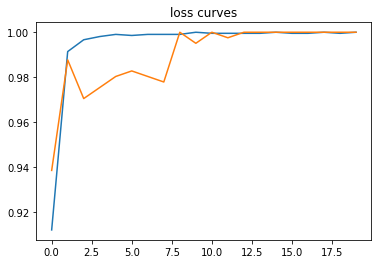

In [ ]:
plot_history(history)

## Evaluate model 

In [ ]:
# evaluate model
_, acc = model.evaluate(test_it, 
                        steps=len(test_it), 
                        verbose=1)
print('> %.3f' % (acc * 100.0))

14/14 [==============================] - 5s 352ms/step - loss: 0.0473 - accuracy: 0.9932
> 99.324


In [ ]:
safe_save(model, save_path = '/content/classifier.h5')
safe_save(model, save_path = '/drive/MyDrive/classifier.h5')

_______________

## Inference

In [ ]:
im_path = "/content/Corresponding id _10-236.png"
im = plt.imread(im_path)

In [ ]:
string_predict_single(model, im, class_map)

('bleu', array([[9.9997032e-01, 1.2678813e-08, 2.9658062e-05]], dtype=float32))

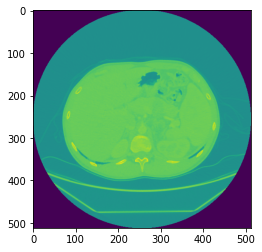

In [ ]:
plt.imshow(im)